# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='lcd-san'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
station,string,
station_name,string,
elevation,number,
latitude,number,
longitude,number,
date,datetime,
reporttpye,string,
hourlyskyconditions,string,
hourlyvisibility,number,
hourlyprsentweathertype,string,


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,station,station_name,elevation,latitude,longitude,date,reporttpye,hourlyskyconditions,hourlyvisibility,hourlyprsentweathertype,...,monthlymaxsealevelpressuretime,monthlyminsealevelpressurevalue,monthlyminsealevelpressuredate,monthlyminsealevelpressuretime,monthlytotalheatingdegreedays,monthlytotalcoolingdegreedays,monthlydeptfromnormalheatingdd,monthlydeptfromnormalcoolingdd,monthlytotalseasontodateheatingdd,monthlytotalseasontodatecoolingdd
0,WBAN:23188,SAN DIEGO INTERNATIONAL AIRPORT CA US,4.6,32.7336,-117.1831,2008-08-01 00:51:00,FM-15,OVC:08 15,9.0,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
1,WBAN:23188,SAN DIEGO INTERNATIONAL AIRPORT CA US,4.6,32.7336,-117.1831,2008-08-01 01:51:00,FM-15,OVC:08 15,9.0,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
2,WBAN:23188,SAN DIEGO INTERNATIONAL AIRPORT CA US,4.6,32.7336,-117.1831,2008-08-01 02:51:00,FM-15,OVC:08 13,9.0,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
3,WBAN:23188,SAN DIEGO INTERNATIONAL AIRPORT CA US,4.6,32.7336,-117.1831,2008-08-01 03:51:00,FM-15,OVC:08 13,9.0,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
4,WBAN:23188,SAN DIEGO INTERNATIONAL AIRPORT CA US,4.6,32.7336,-117.1831,2008-08-01 04:00:00,FM-12,NaN,8.7,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,19
const,14
datetime,1
number,51
other,5


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0,1019,60699,61808,62764,121583,122522
station,WBAN:23188,WBAN:23188,WBAN:23188,WBAN:23188,WBAN:23188,WBAN:23188,WBAN:23188
station_name,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US
elevation,4.6,4.6,4.6,4.6,4.6,4.6,4.6
latitude,32.7336,32.7336,32.7336,32.7336,32.7336,32.7336,32.7336
longitude,-117.183,-117.183,-117.183,-117.183,-117.183,-117.183,-117.183
dailysnowfall,NaN,NaN,0,0,0,0,0
dailysnowdepth,NaN,NaN,NaN,NaN,NaN,0,0
monthlygreatestsnowfall,NaN,NaN,0,NaN,NaN,NaN,NaN
monthlydayswithgt32temp,NaN,0,0,NaN,0,NaN,0
monthlydayswithlt0temp,NaN,0,0,NaN,0,NaN,0


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

,0
monthlyaveragerh,NaN
monthlydewpointtemp,NaN
monthlywetbulbtemp,NaN
monthlyavgheatingdegreedays,NaN
monthlyavgcoolingdegreedays,NaN
monthlyaveragewindspeed,NaN
monthlytotalsnowfall,NaN
monthlygreatestprecip,NaN
monthlygreatestprecipdate,NaN
monthlygreatestsnowfalldate,NaN


# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122687 entries, 0 to 122686
Data columns (total 1 columns):
date    122687 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 958.6 KB


None

,count,unique,top,freq,first,last
date,122687,122687,2009-01-07 21:51:00,1,2008-08-01 00:51:00,2018-07-05 23:59:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122687 entries, 0 to 122686
Data columns (total 51 columns):
hourlyvisibility                    111517 non-null float64
hourlydrybulbtempf                  119052 non-null float64
hourlydrybulbtempc                  119052 non-null float64
hourlywetbulbtempf                  118921 non-null float64
hourlywetbulbtempc                  118921 non-null float64
hourlydewpointtempf                 118838 non-null float64
hourlydewpointtempc                 118838 non-null float64
hourlyrelativehumidity              119000 non-null float64
hourlywindspeed                     118885 non-null float64
hourlywindgustspeed                 2631 non-null float64
hourlystationpressure               118990 non-null float64
hourlypressuretendency              41913 non-null float64
hourlypressurechange                18306 non-null float64
hourlysealevelpressure              101273 non-null float64
hourlyprecip                        86308 non-null fl

None

,count,mean,std,min,25%,50%,75%,max
hourlyvisibility,111517.0,8.936204,2.235254,0.00,9.0000,10.000,10.0000,15.00
hourlydrybulbtempf,119052.0,64.110490,7.092912,40.00,59.0000,64.000,69.0000,101.00
hourlydrybulbtempc,119052.0,17.838641,3.939689,4.40,15.0000,17.800,20.6000,38.30
hourlywetbulbtempf,118921.0,57.738658,6.399749,31.00,54.0000,58.000,62.0000,76.00
hourlywetbulbtempc,118921.0,14.303562,3.546974,-0.60,12.1000,14.400,16.8000,24.20
hourlydewpointtempf,118838.0,52.289335,9.525331,-7.00,48.0000,54.000,59.0000,72.00
hourlydewpointtempc,118838.0,11.272004,5.291449,-21.70,8.9000,12.200,15.0000,22.20
hourlyrelativehumidity,119000.0,68.299134,16.738779,4.00,61.0000,71.000,79.0000,100.00
hourlywindspeed,118885.0,5.422215,4.181995,0.00,3.0000,6.000,8.0000,39.00
hourlywindgustspeed,2631.0,23.608894,5.607794,16.00,20.0000,22.000,26.0000,52.00


In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


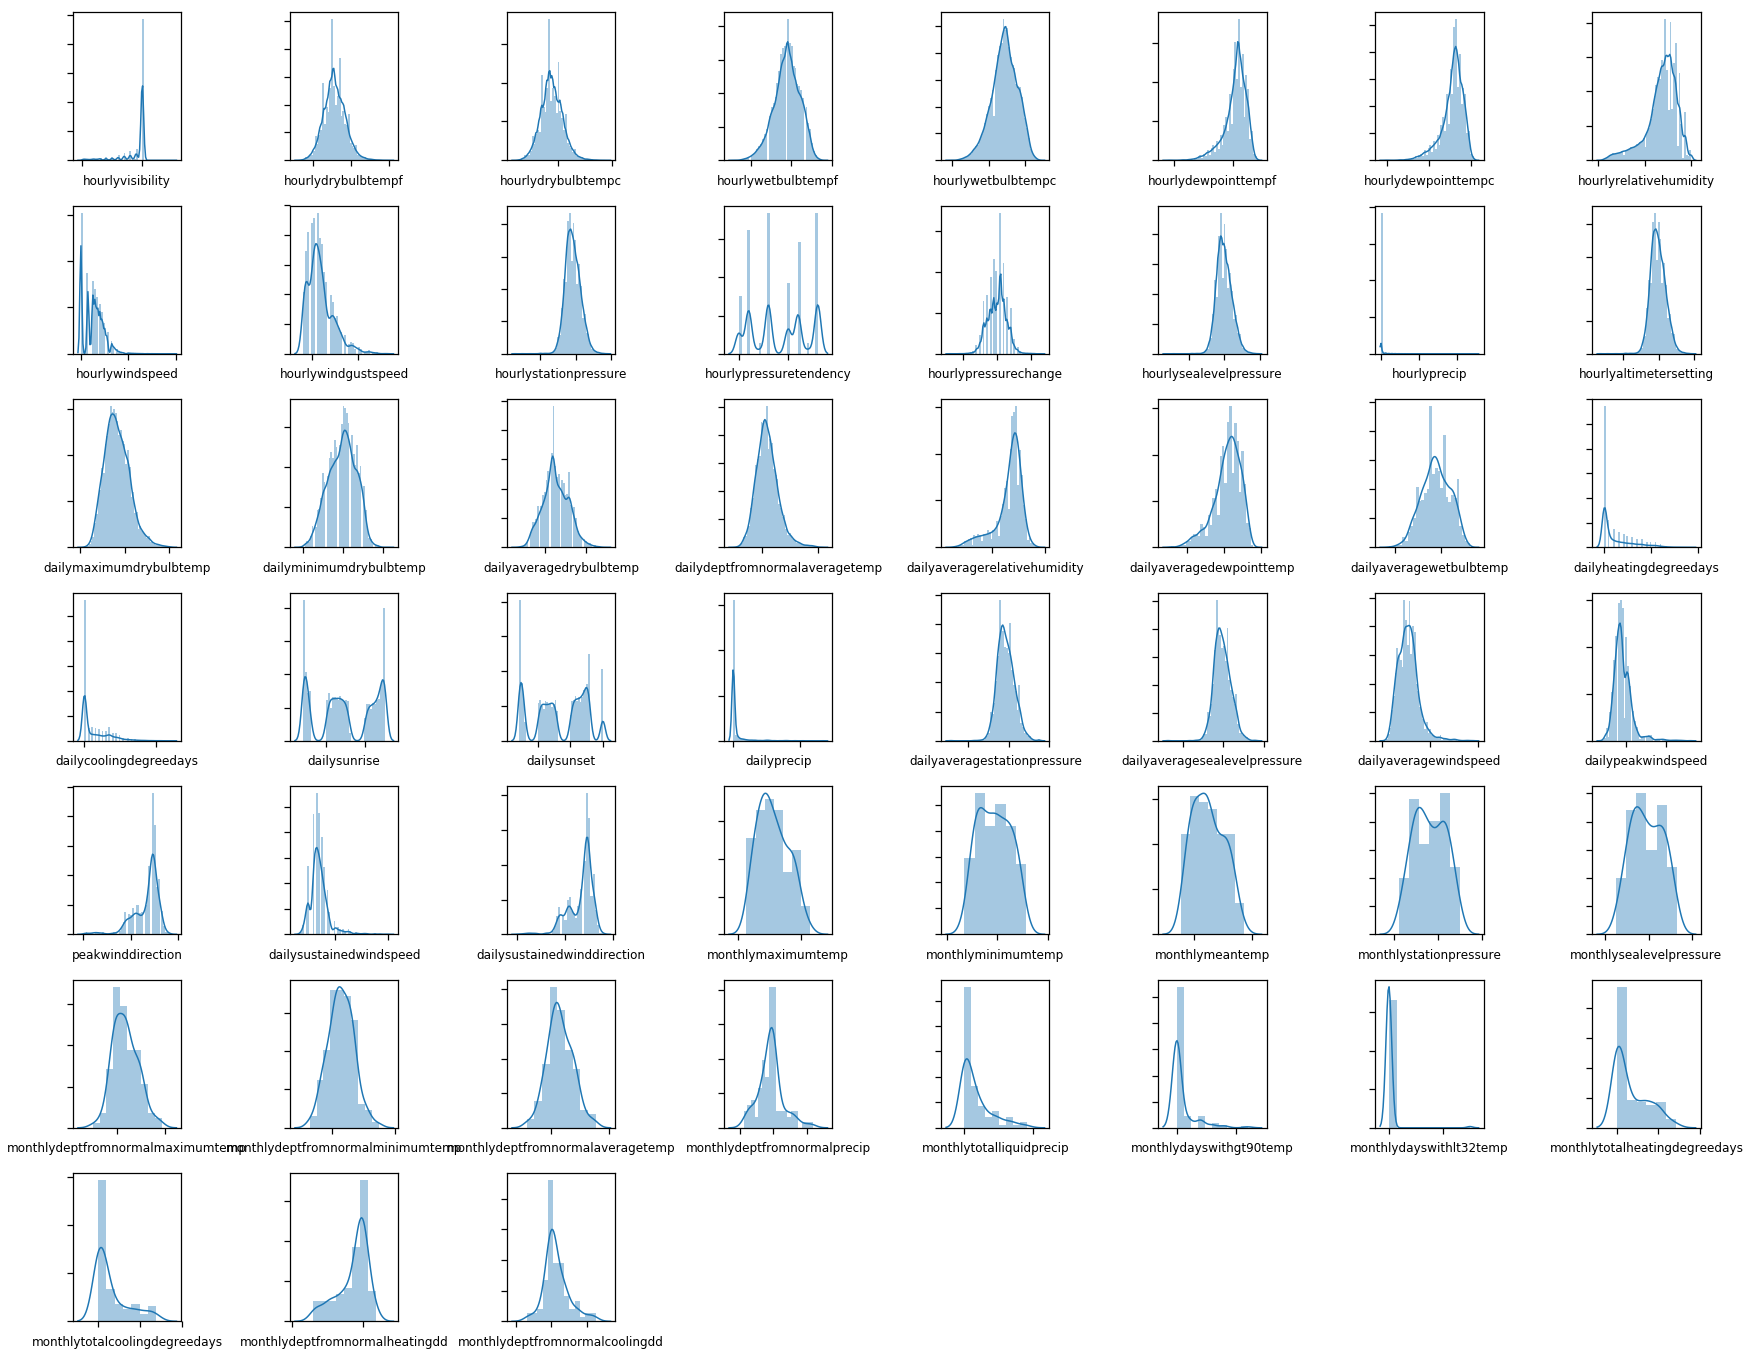

In [14]:
plot_histograms(df[number_col_names])

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
            #g.set(xticklabels=[])
            #g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
  

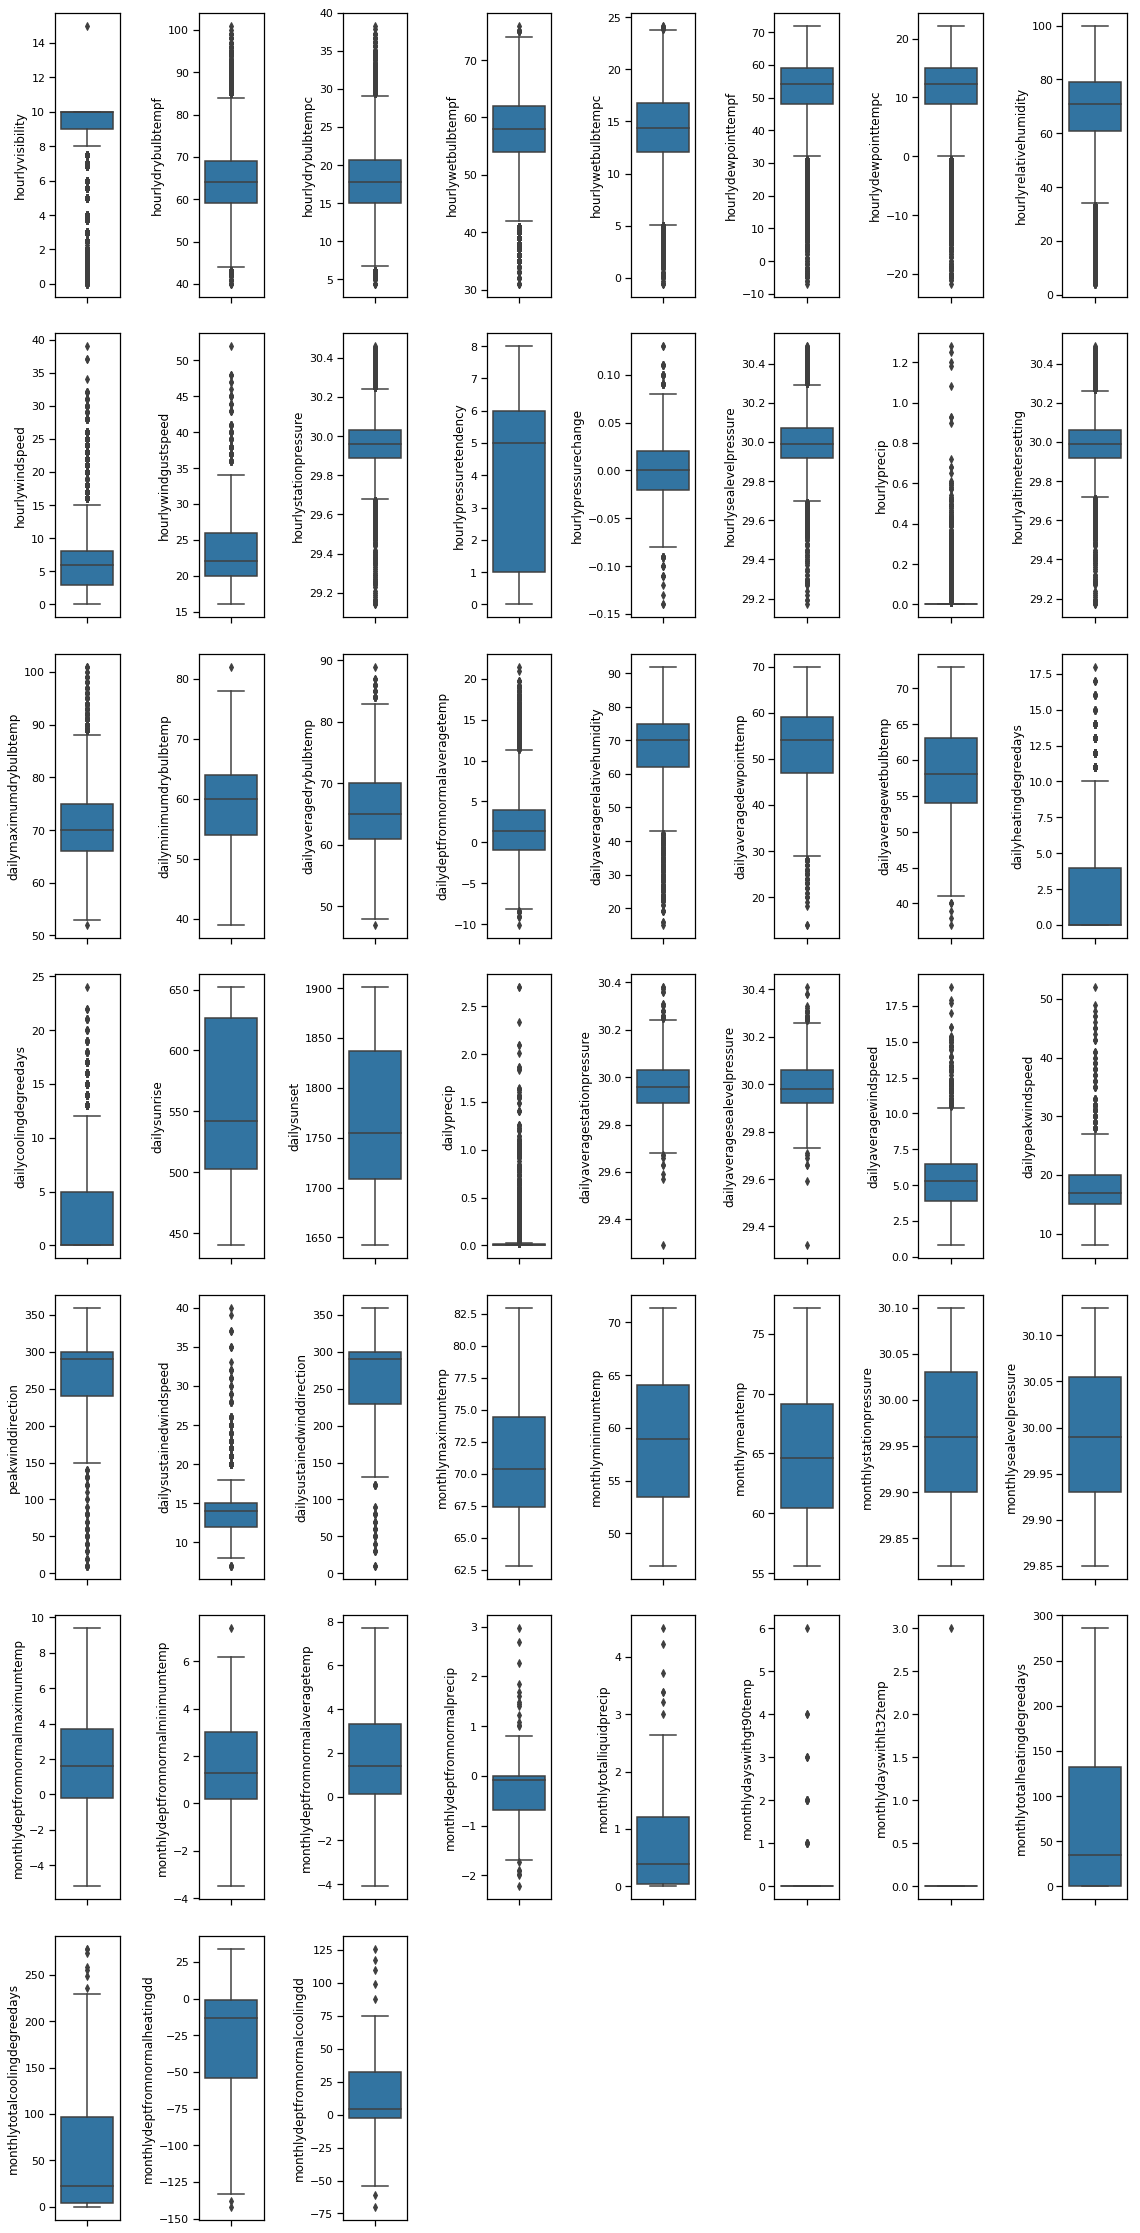

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
df.hourlydrybulbtempf.describe()

count    119052.000000
mean         64.110490
std           7.092912
min          40.000000
25%          59.000000
50%          64.000000
75%          69.000000
max         101.000000
Name: hourlydrybulbtempf, dtype: float64

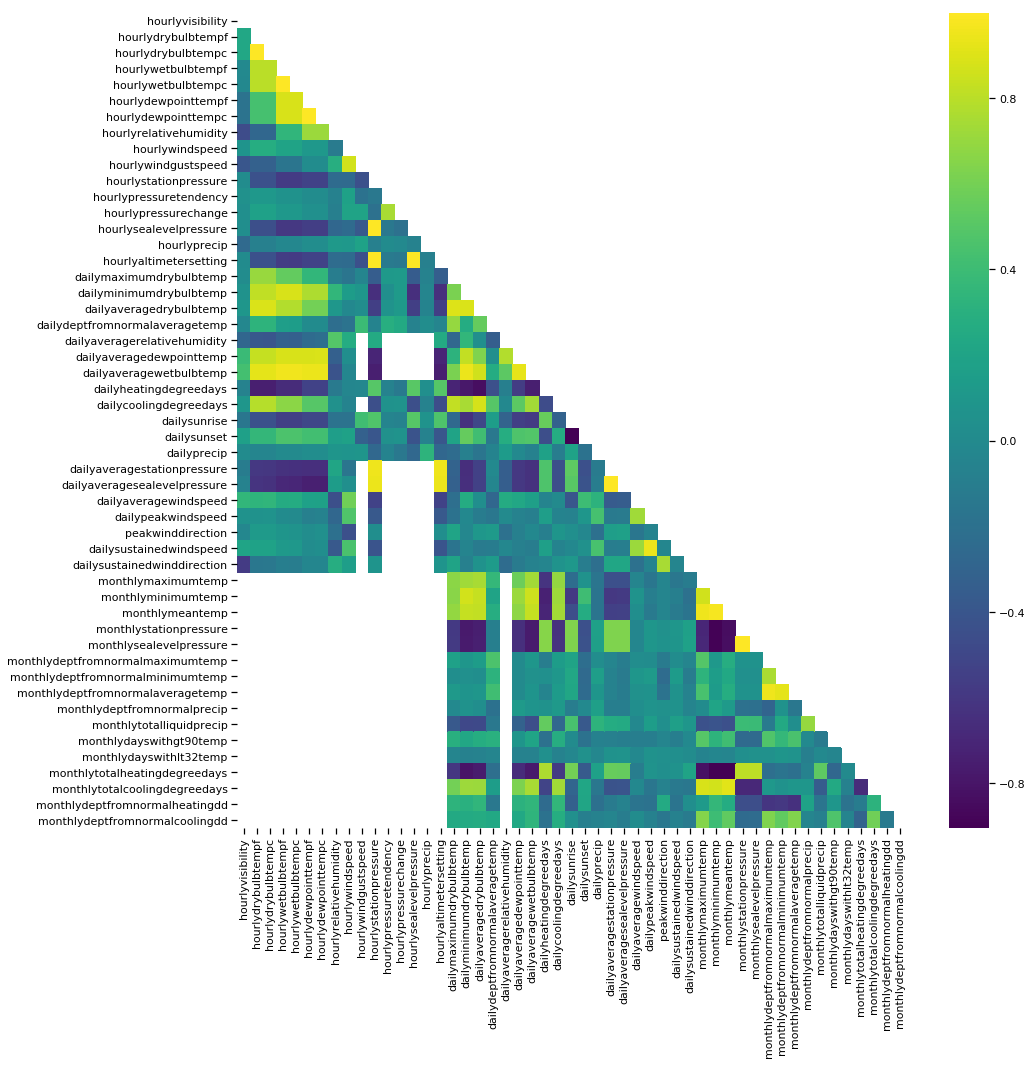

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

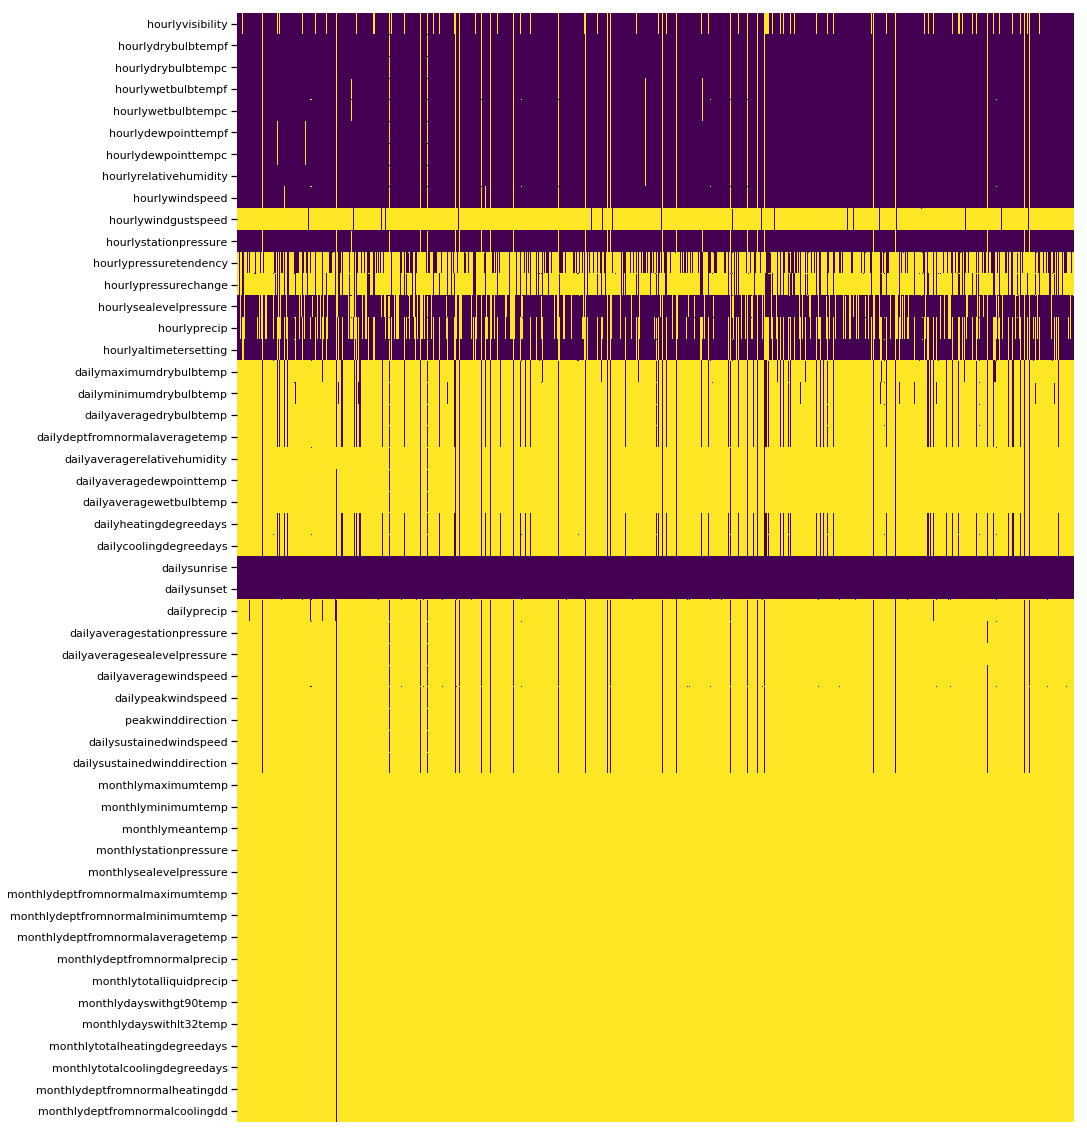

In [30]:
fig, ax = plt.subplots(figsize=(15,.4*len(number_col_names)))
sns.heatmap(df[number_col_names].sample(10000).isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122687 entries, 0 to 122686
Data columns (total 5 columns):
reporttpye                 122687 non-null object
hourlyskyconditions        104224 non-null object
hourlyprsentweathertype    14893 non-null object
hourlywinddirection        118684 non-null object
dailyweather               1397 non-null object
dtypes: object(5)
memory usage: 4.7+ MB


None

,count,unique,top,freq
reporttpye,122687,5,FM-15,87016
hourlyskyconditions,104224,18314,CLR:00,6020
hourlyprsentweathertype,14893,97,BR:1 ||,6520
hourlywinddirection,118684,39,000,28206
dailyweather,1397,28,BR:13 HZ:08,268


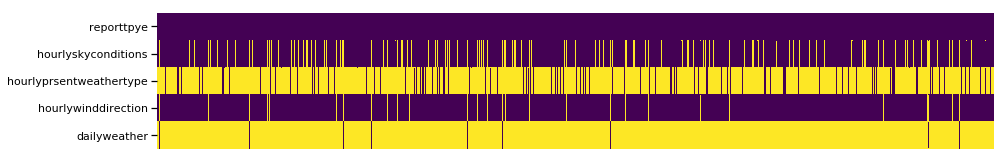

In [26]:
if other_col_names:
    fig, ax = plt.subplots(figsize=(15,.5*len(other_col_names)))
    sns.heatmap(df[other_col_names].sample(10000).isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )